<h1><center> Web Scraping and Modeling Runners' Times in the Cherry Blossom Race </center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Deliverables -TO BE DELETED LATER

#### FROM 2DS POST
- Choose one of the following problems from the back of the chapter 2 : 7, 10, 11, or 17. Write a report on your analysis, including introduction, background, methods, results, and conclusions/discussions. Note that the focus of this study is getting the data into the correct format. The analysis section is going to be relatively simple from a statistical standpoint—graphics, descriptive statistics, etc., to answer the question from the problem that you chose.

## Problem to Solve



Q11. Normalize each male runner's time by the fastest time for the runner of the same age. To do this, find the fastest runner for each year of age from 20 to 80. The tapply() function may be helpful here. Smooth these times using loess() , and find the smoothed time using predict() . Use these smoothed times to normalize each run time. Use density plots, quantile-quantile plots, and summary statistics to compare the distribution of the age-normalized times for the runners in 1999 and 2012. What do you find? Repeat the process for the women. Compare the women in 1999 to the women in 2012 and to the men in 1999 and 2012.



### Contents

<a href="#BasicStats">Basic Stats</a>

## Abstract

### Introduction

In this Data Era, there are potentials in analyzing data and bringing insights to a problem we have interests in. For instance, to find out whether there is a relationship between physical performance and aging and what the relationship is, road races data can be the data we could do analysis on. This kind of data is collected by the race organizers and it is at individual level. Data is often published on the Web. We can bring some insights to the question we have interests in. 

Cherry Blossom Ten Mile Run is one of the annual race held in Washington D.C. early April which the cherry blossom is blooming around this time. This race run started in 1973 as a training run for runners planning to compete in Boston Marathon. Its participants range from age 9 to 89. The organizer publish the results at http://www.cherryblossom.org/. The data published provides a very helpful resource including name, sex, hometown and final time of participants for us to learn the relationship between physical performance and aging.

The original analysis was provided by the book of Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving. The data has been already web-scraped and it has results from all years from 1999 to 2012. The data is divided by genders meaning MenTxt for men and WomenTxt for women. 

To answer the above questions, we are using the data for each gender. 

Resources: Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving

## Background

## Methods

### Data Import and Exploration

Based on the initial data import in the book of Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving, this process can be challenging due to the data format changing over time. Let us start off reading the raw file by using readLines() function.

## Results

## Conclusion

## CODE PORTION

In [ ]:
#install.packages('XML', repos="http://cran.us.r-project.org")
# install.packages('tictoc', repos='http://cran.us.r-project.org')
# install.packages('XML', dependencies=TRUE, repos='http://cran.rstudio.com/')

In [1]:
library("XML")
library(RColorBrewer)
ls("package:RColorBrewer")

Warning message:
"package 'XML' was built under R version 3.5.2"

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

### Extract files from Web Site

In [3]:
# root path of the web site
ubase = "http://www.cherryblossom.org/"
years = 1999:2012

womenURLs = 
  c("results/1999/cb99f.html", "results/2000/cb003f.htm", "results/2001/oof_f.html",
    "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
    "results/2004/women.htm", "results/2005/CB05-F.htm", 
    "results/2006/women.htm", "results/2007/women.htm", 
    "results/2008/women.htm", "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")
menURLs = 
  c("results/1999/cb99m.html", "results/2000/cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

In [4]:
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url, encoding = "UTF-8")

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 1999 & sex == "male") {
      # Get preformatted text from 4th font element
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]] 
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }



In [5]:
extractPath_men = './MenTxt/'
menfiles = paste(extractPath_men, years,'.txt' ,sep = "")
#files
# generate url for men
urls = paste(ubase, menURLs, sep = "")


In [6]:
# extract files into folder for men
menTables = mapply(extractResTable, url = urls, year = years,  file = menfiles)
# names(menTables) = years
# sapply(menTables, length)
# save(menTables, file = "CBMenTextTables.rda")

* extract women files

In [7]:
# generate url for men
extractPath_women = './WomenTxt/'
womenfiles = paste(extractPath_women, years,'.txt' ,sep = "")
urls = paste(ubase, womenURLs, sep = "")
# extract files into folder for men
womenTables = mapply(extractResTable, url = urls, year = years, sex= 'female', file = womenfiles)

### Data Import and Cleanup

In [9]:
# function to import text files
extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
  
     # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
      
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

In [11]:
# function to find column location
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [40]:
# function to select clolumns
selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
            c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
           #c(searchLocs[index] + 1, searchLocs[index + 1]) # we need to come back to see if we can fix it.
         },
         headerRow = headerRow, searchLocs = searchLocs )
}


In [41]:
# call extractVariables function to get 
mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

menResMat = lapply(menFiles, extractVariables)
length(menResMat)
sapply(menResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3016 3561 3723 3946 4156 4324 5235 5274 5905 6649 6909 7011 7193

### 2001.txt are missing header, copied from men 2001.txt, we need to see how to fix it programtically. -Bin

In [42]:
# call extractVariables function to get 
wmfilenames = paste("./WomenTxt/", 1999:2012, ".txt", sep = "")
womenFiles = lapply(wmfilenames, readLines)
names(womenFiles) = 1999:2012

womenResMat = lapply(womenFiles, extractVariables)
length(womenResMat)
sapply(womenResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2356 2166 2972 3334 3542 3899 4333 5435 5690 6397 8323 8853 9030 9730

<a id ="BasicStats">
    <h2> Basic Stats</h2>
    </a>

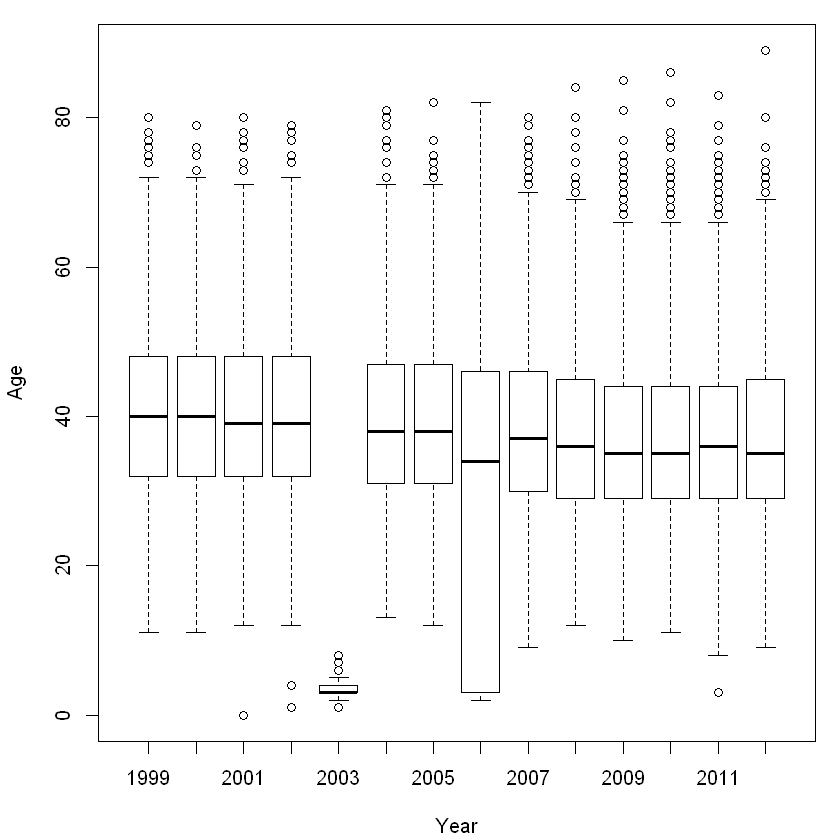

In [43]:
# age distribution
age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))

#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
#dev.off()

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

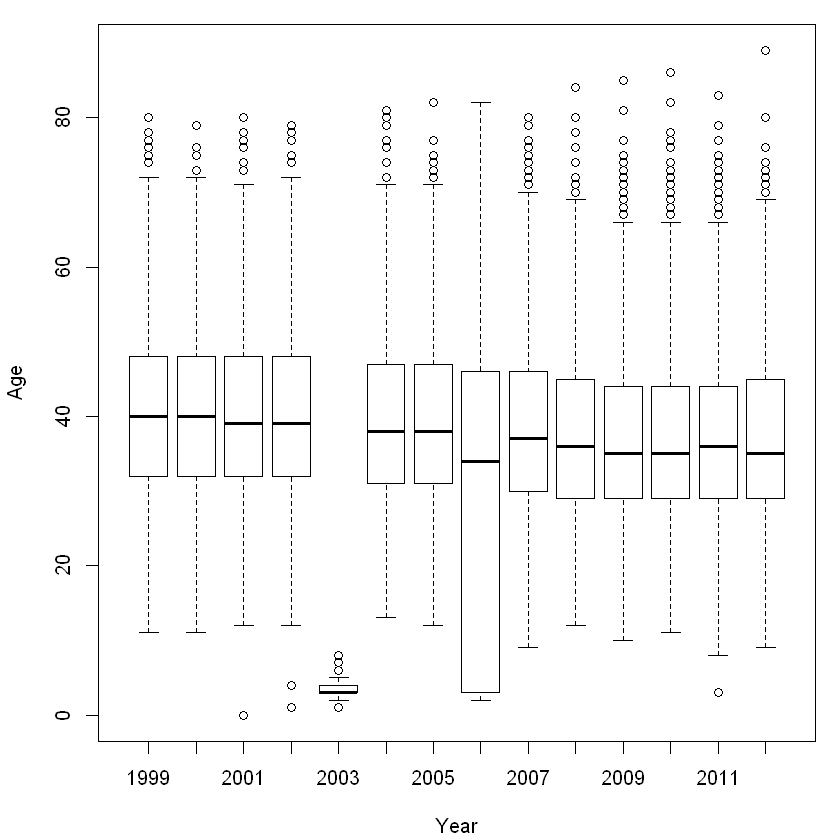

In [44]:
# age distribution
womenage = sapply(womenResMat,
             function(x) as.numeric(x[ , 'ag']))

#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
#dev.off()

In [45]:
# find back age indexes
sapply(age,  function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    0    0    2    2    0   10    0    3    0    0    4    0    1

In [46]:
# find back age indexes
sapply(womenage,  function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   4    0    0    4    0    0    8    1    2    0    2    0    1    0

## will remove these na later on

In [47]:
# function to convert the times
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}


In [48]:
# function to create dataframe
createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [49]:
# fix 2006 NA
separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX
menResMat = sapply(menFiles, extractVariables)

In [50]:
# fix 2006 NA
separatorIdx = grep("^===", menFiles[["2007"]])
separatorRow = menFiles[['2007']][separatorIdx]
separatorRow
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2007']][separatorIdx] = separatorRowX
menResMat = sapply(menFiles, extractVariables)

[1] "===== =========== ====== ====================== == ================== =======  ===== = ======= "

In [51]:
# call createDF function for Men
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

In [53]:
# fix 2006 NA
separatorIdx = grep("^===", womenFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
womenFiles[['2006']][separatorIdx] = separatorRowX
womenResMat = sapply(womenFiles, extractVariables)

In [54]:
# call createDF function for women
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
               sex = rep("F", 14), SIMPLIFY = FALSE)
sapply(womenDF, function(x) sum(is.na(x$runTime)))

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

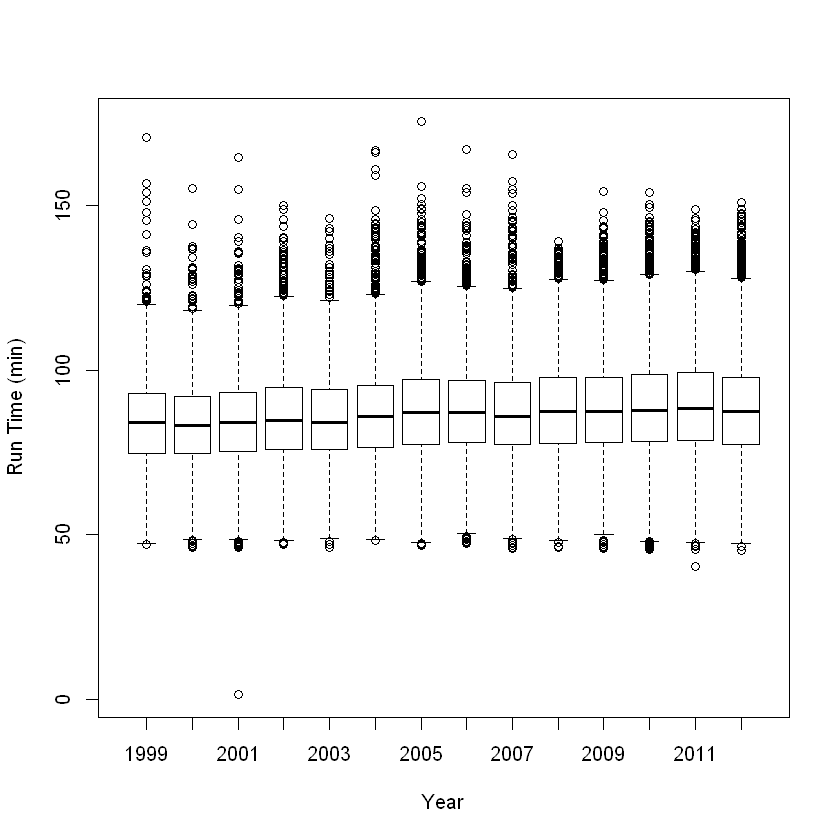

In [55]:
#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
#dev.off()

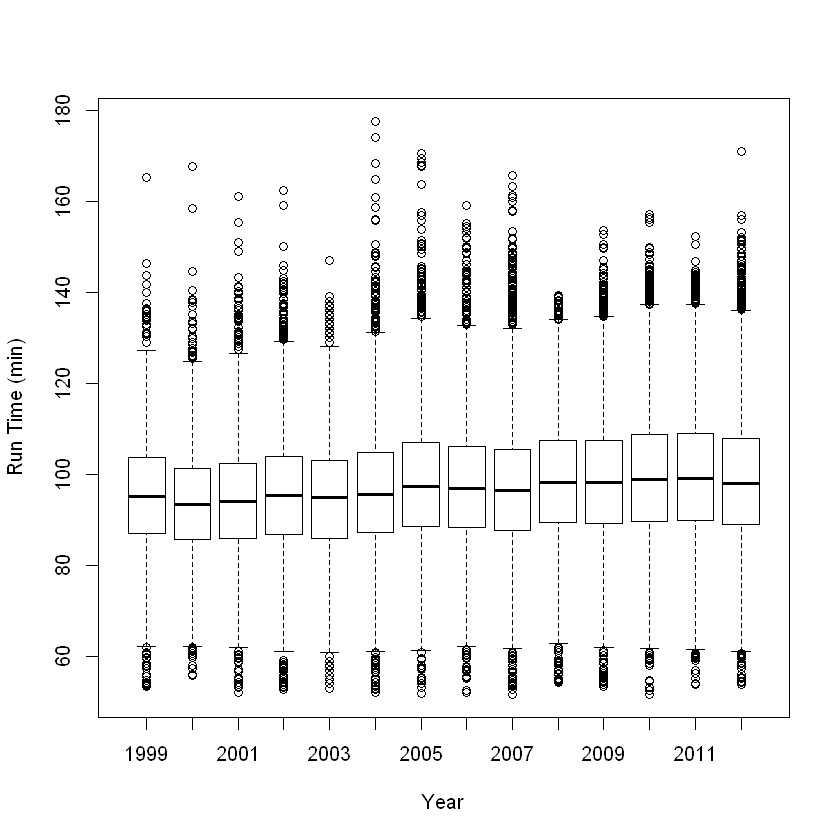

In [56]:
#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(womenDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
#dev.off()

In [57]:
cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")

dim(cbMen)

[1] 70070     6

In [58]:
cbWomen = do.call(rbind, womenDF)
save(cbWomen, file = "cbWomen.rda")

dim(cbWomen)

[1] 75972     6

In [59]:
load("cbMen.rda")

In [60]:
load("cbWomen.rda")

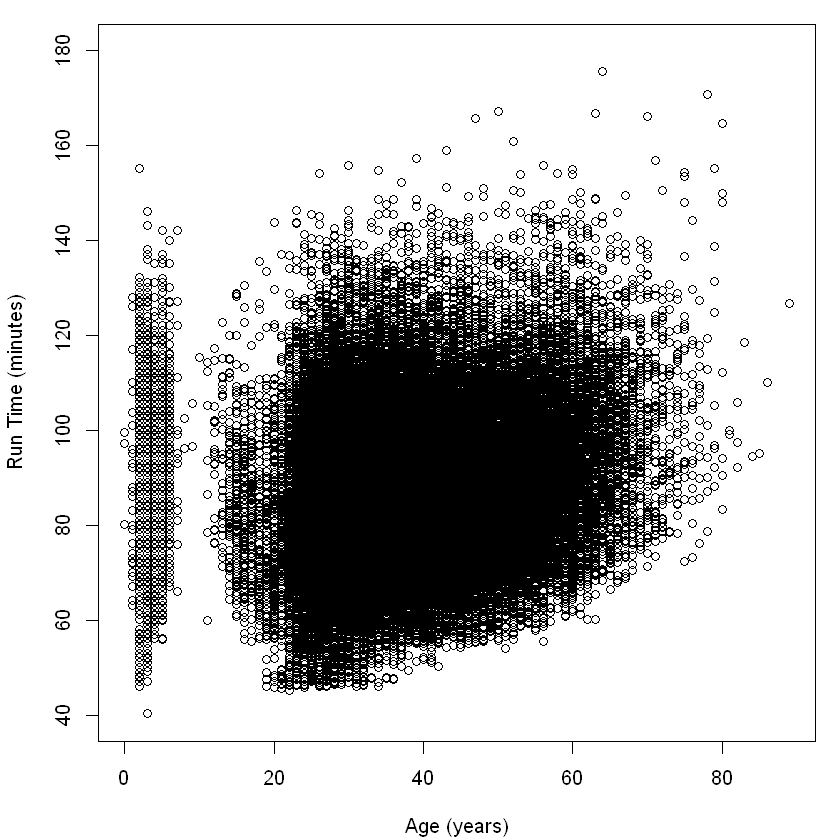

In [61]:
#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbMen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

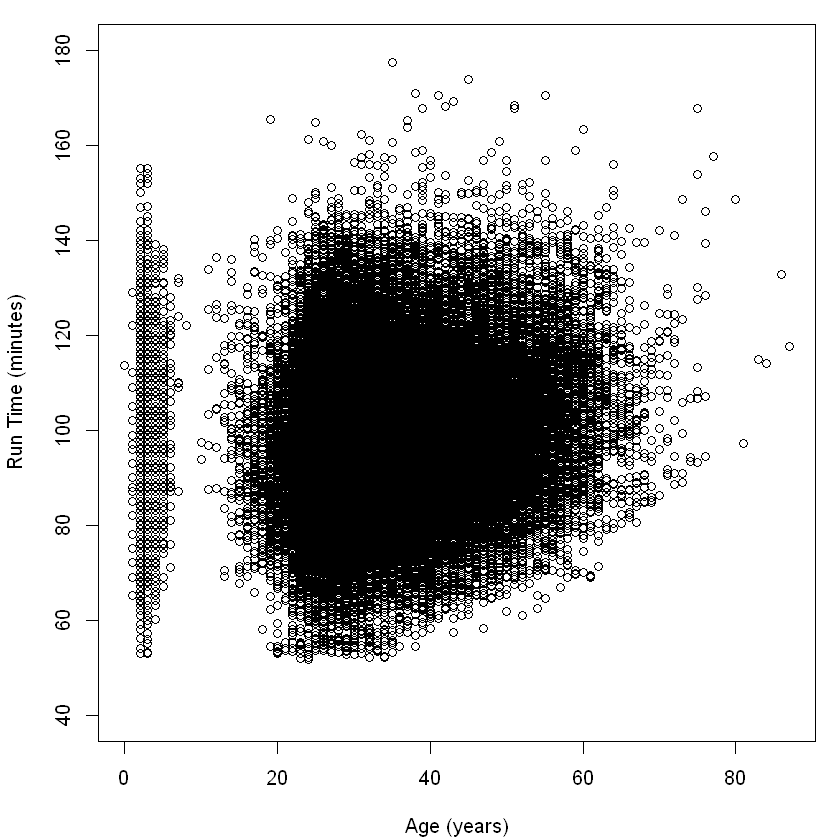

In [62]:
#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbWomen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

[1] "#54278F"

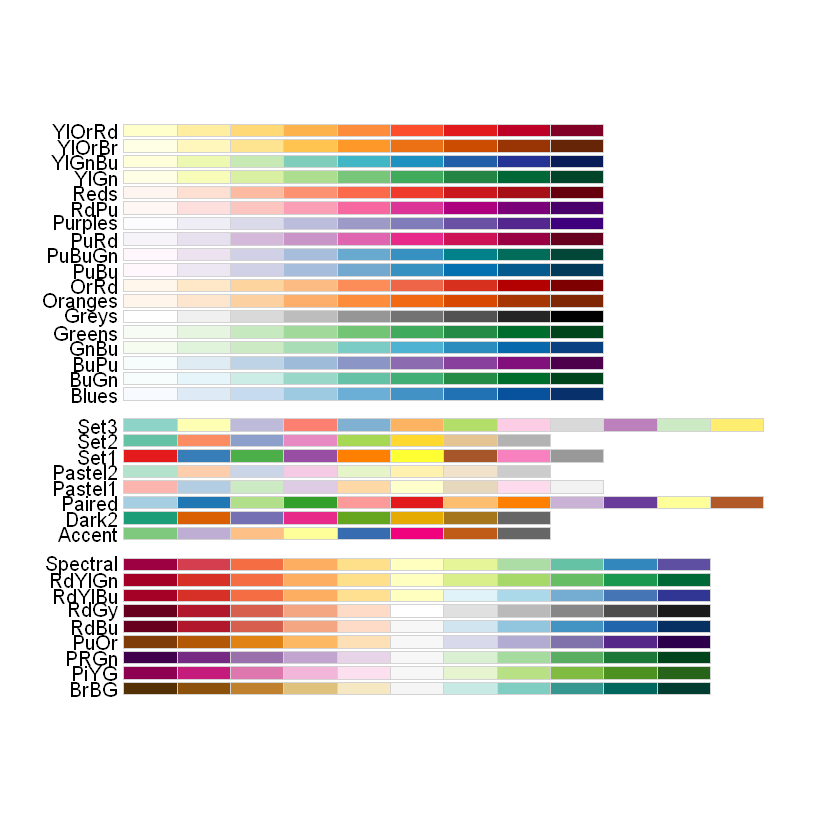

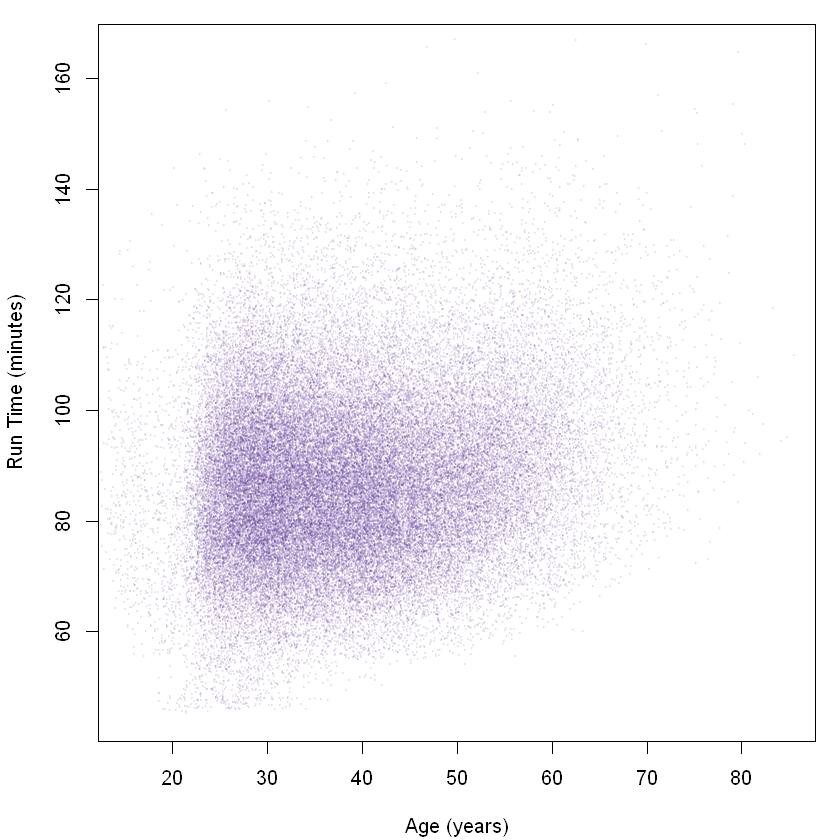

In [63]:


display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")

pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
dev.off()



[1] "#54278F"

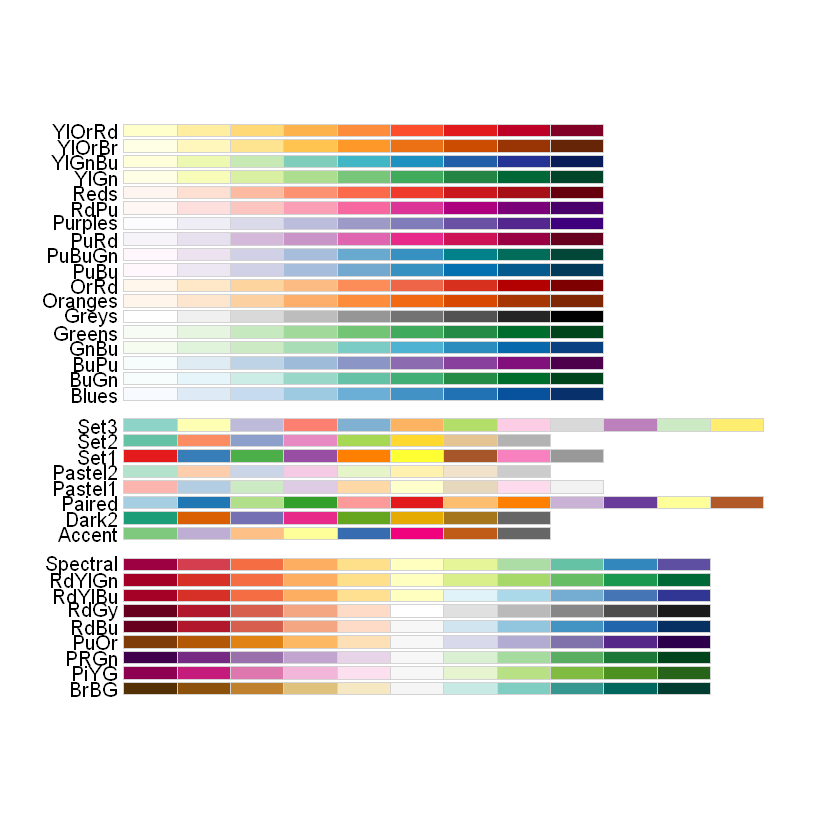

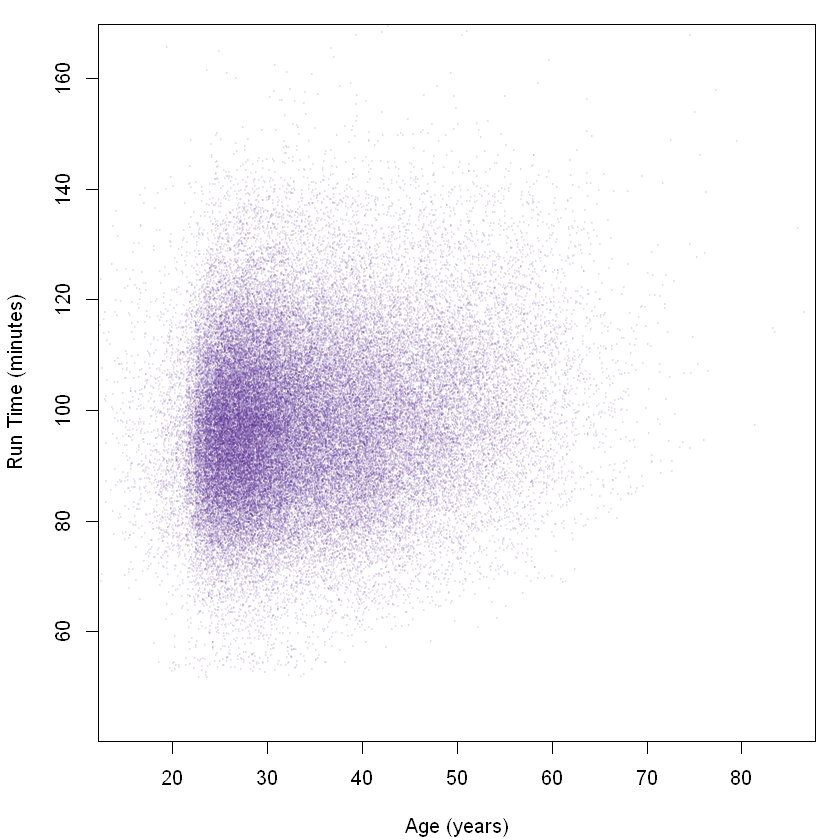

In [64]:
display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")

#pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbWomen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
#dev.off()


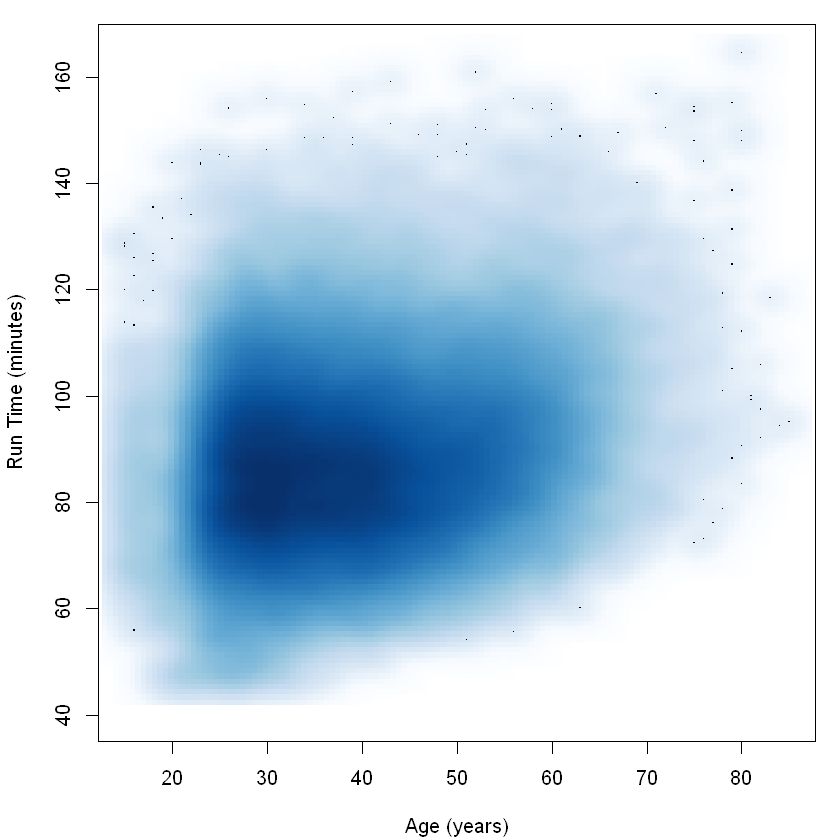

In [65]:
#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbMen$runTime, x = cbMen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

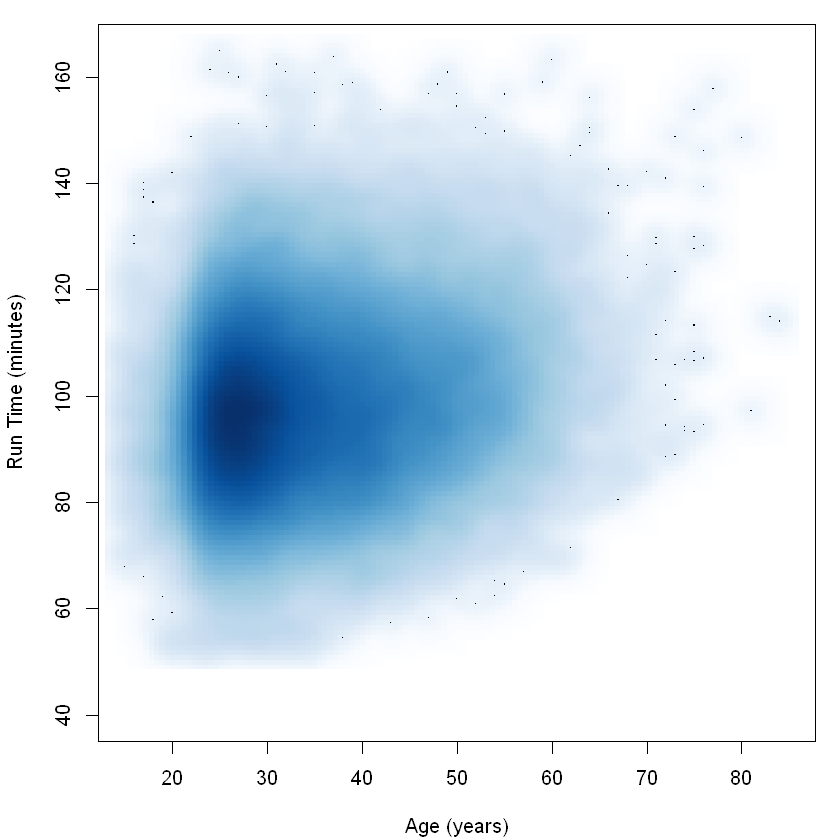

In [66]:
#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbWomen$runTime, x = cbWomen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5328   22994   18826   11405    4658     705      66 

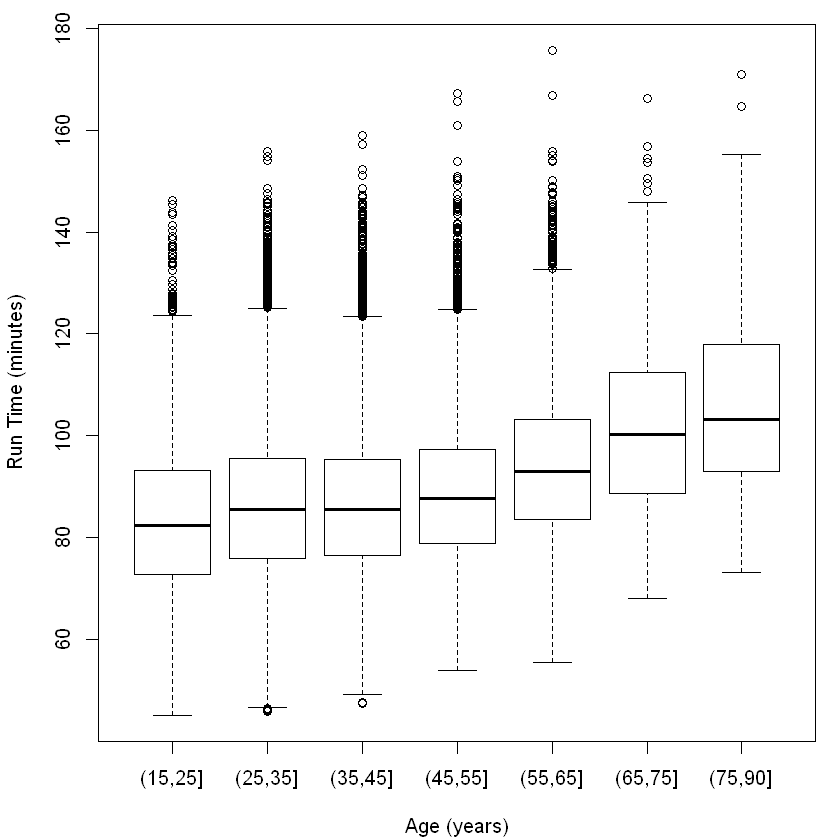

In [67]:

cbMenSub = cbMen[cbMen$runTime > 30 &
                 !is.na(cbMen$age) & cbMen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbMenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

In [ ]:
summary(cbWomenSub)

### need to fix this error -Bin

In [68]:
cbWomenSub = cbWomen[cbWomen$runTime > 30 &
                 !is.na(cbWomen$age) & cbWomen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbWomenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5328   22994   18826   11405    4658     705      66 

ERROR: Error in (function (formula, data = NULL, subset = NULL, na.action = na.fail, : variable lengths differ (found for 'ageCat')


In [69]:
lmAge = lm(runTime ~ age, data = cbMenSub)

lmAge$coefficients

summary(lmAge)

class(lmAge)

(Intercept)         age 
 77.8923643   0.2438737


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.101 -10.258  -1.068   9.108  82.100 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 77.892364   0.217157  358.69   <2e-16 ***
age          0.243874   0.005389   45.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.82 on 63980 degrees of freedom
Multiple R-squared:  0.03102,	Adjusted R-squared:  0.031 
F-statistic:  2048 on 1 and 63980 DF,  p-value: < 2.2e-16


[1] "lm"

In [70]:
lmWomenAge = lm(runTime ~ age, data = cbWomenSub)

lmWomenAge$coefficients

summary(lmWomenAge)

class(lmWomenAge)

(Intercept)         age 
 90.6885485   0.2151148


Call:
lm(formula = runTime ~ age, data = cbWomenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.986  -9.601  -0.678   8.722  79.299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 90.68855    0.20485  442.70   <2e-16 ***
age          0.21512    0.00581   37.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.19 on 69216 degrees of freedom
Multiple R-squared:  0.01942,	Adjusted R-squared:  0.01941 
F-statistic:  1371 on 1 and 69216 DF,  p-value: < 2.2e-16


[1] "lm"

* only choose 20 to 80 years old

In [71]:
age20to80 = 20:80

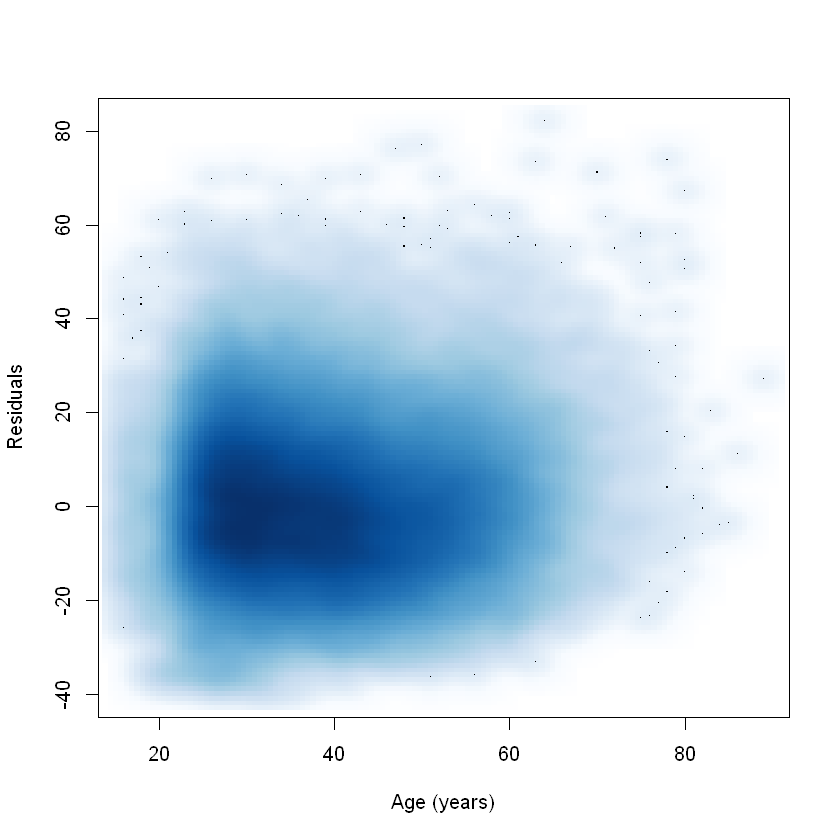

In [72]:
smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")

In [73]:
length(lmAge$residuals)

[1] 63982

In [74]:
length(cbMenSub$age)

[1] 63982

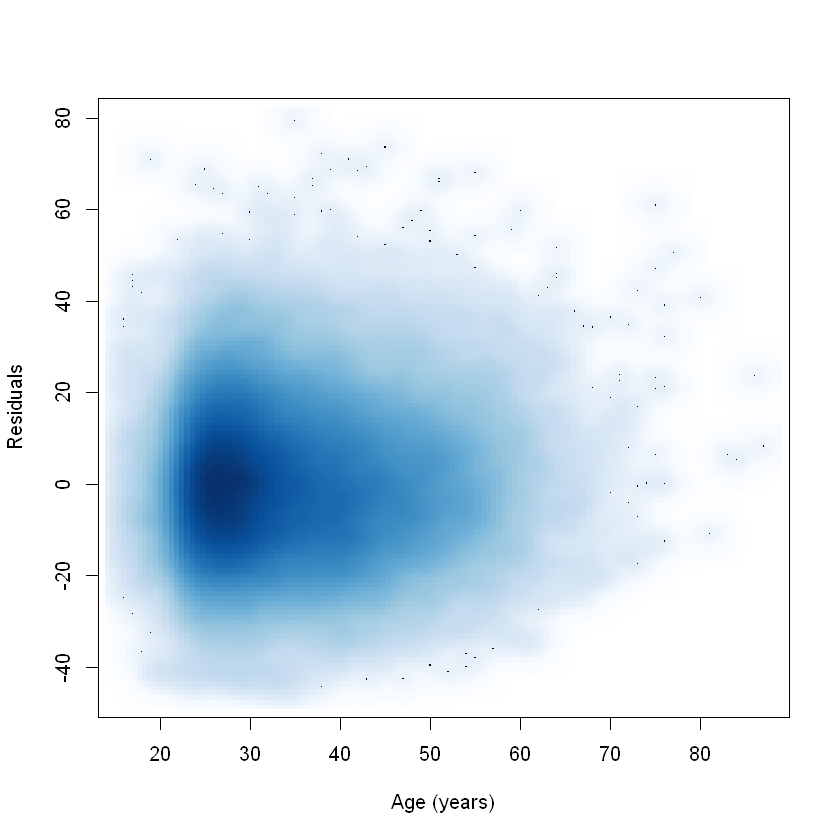

In [75]:
smoothScatter(x = cbWomenSub$age, y = lmWomenAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")

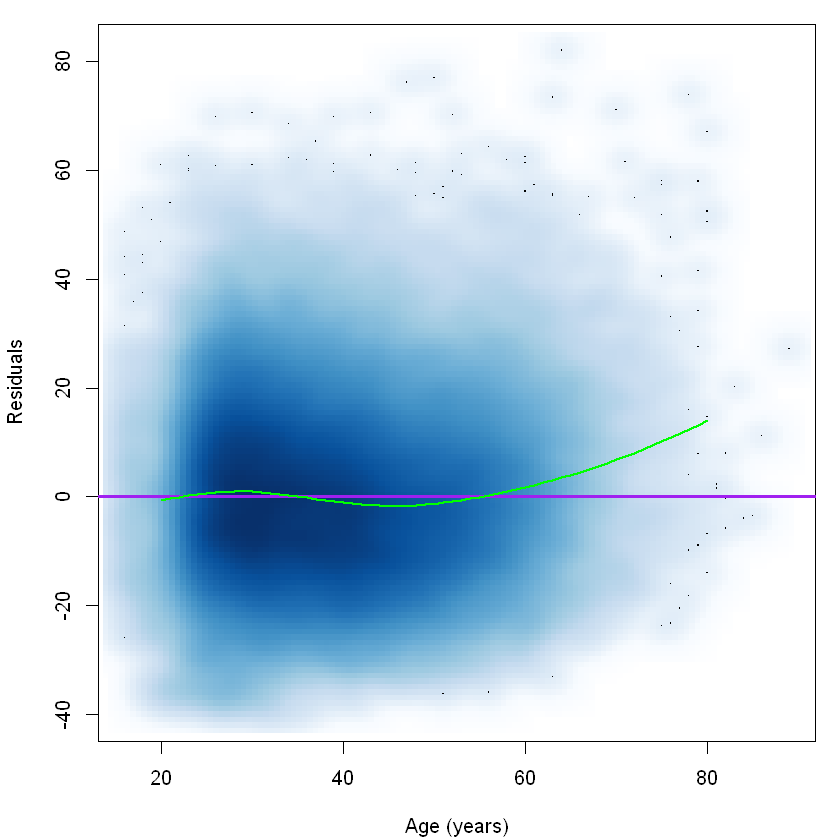

In [76]:
#pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmAge),
                                   age = cbMenSub$age))

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
par(oldPar)
#dev.off()

In [77]:
menRes.lo = loess(runTime ~ age, cbMenSub)

menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbMenSub$age - 50)

lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)

summary(lmOver50)


Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.039 -10.173  -0.954   9.071  78.911 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 81.766471   0.276946  295.24   <2e-16 ***
age          0.128108   0.007451   17.19   <2e-16 ***
over50       0.543670   0.024269   22.40   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.76 on 63979 degrees of freedom
Multiple R-squared:  0.03856,	Adjusted R-squared:  0.03853 
F-statistic:  1283 on 2 and 63979 DF,  p-value: < 2.2e-16


In [78]:

decades = seq(30, 60, by = 10)
overAge = lapply(decades, 
                 function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)
tail(overAge)

lmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbMenSub[, c("runTime", "age")], 
                              overAge))

summary(lmPiecewise)

,over30,over40,over50,over60
63977,36,26,16,6
63978,11,1,0,0
63979,9,0,0,0
63980,26,16,6,0
63981,5,0,0,0
63982,18,8,0,0



Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.567 -10.164  -0.958   9.058  78.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 73.90485    0.95487  77.398  < 2e-16 ***
age          0.42213    0.03467  12.175  < 2e-16 ***
over30      -0.44068    0.04994  -8.824  < 2e-16 ***
over40       0.20698    0.04253   4.867 1.14e-06 ***
over50       0.46774    0.05510   8.488  < 2e-16 ***
over60       0.02615    0.08043   0.325    0.745    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.75 on 63976 degrees of freedom
Multiple R-squared:  0.03974,	Adjusted R-squared:  0.03967 
F-statistic: 529.5 on 5 and 63976 DF,  p-value: < 2.2e-16


In [79]:
overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

tail(overAgeDF)

,age,over30,over40,over50,over60
56,75,45,35,25,15
57,76,46,36,26,16
58,77,47,37,27,17
59,78,48,38,28,18
60,79,49,39,29,19
61,80,50,40,30,20


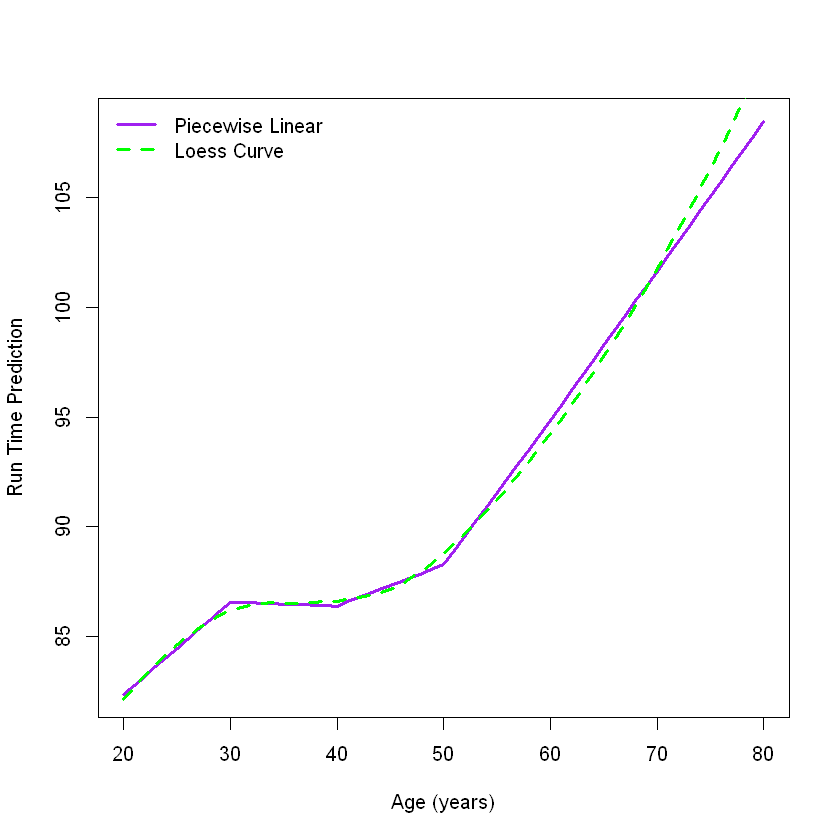

In [80]:
predPiecewise = predict(lmPiecewise, overAgeDF)

plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")


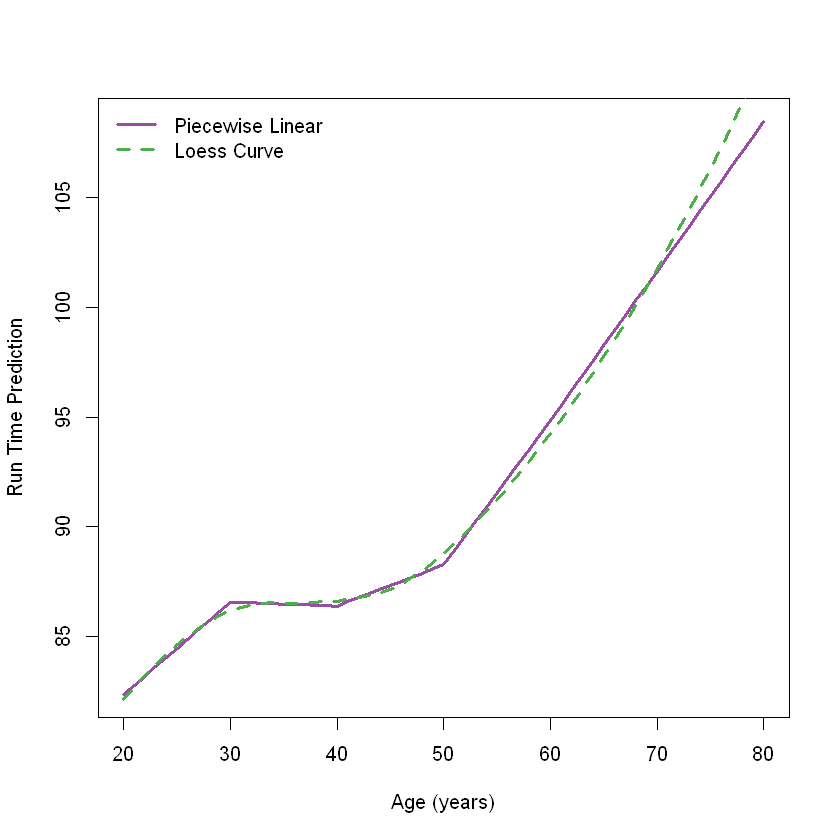

In [81]:

#pdf("CB_PiecewiseLoessCurves.pdf", width = 8, height = 6)
plot(predPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
#dev.off()

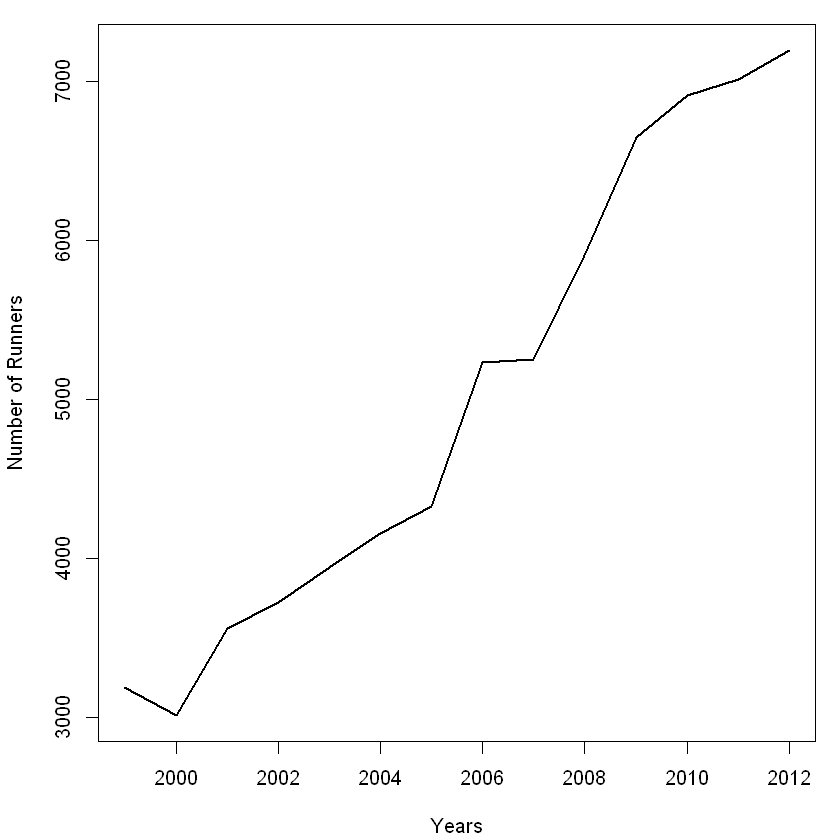

In [82]:
#pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
#dev.off()

In [83]:
summary(cbMenSub$runTime[cbMenSub$year == 1999])

summary(cbMenSub$runTime[cbMenSub$year == 2012])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.82   84.29   84.35   93.06  170.83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.44   97.78  150.98 

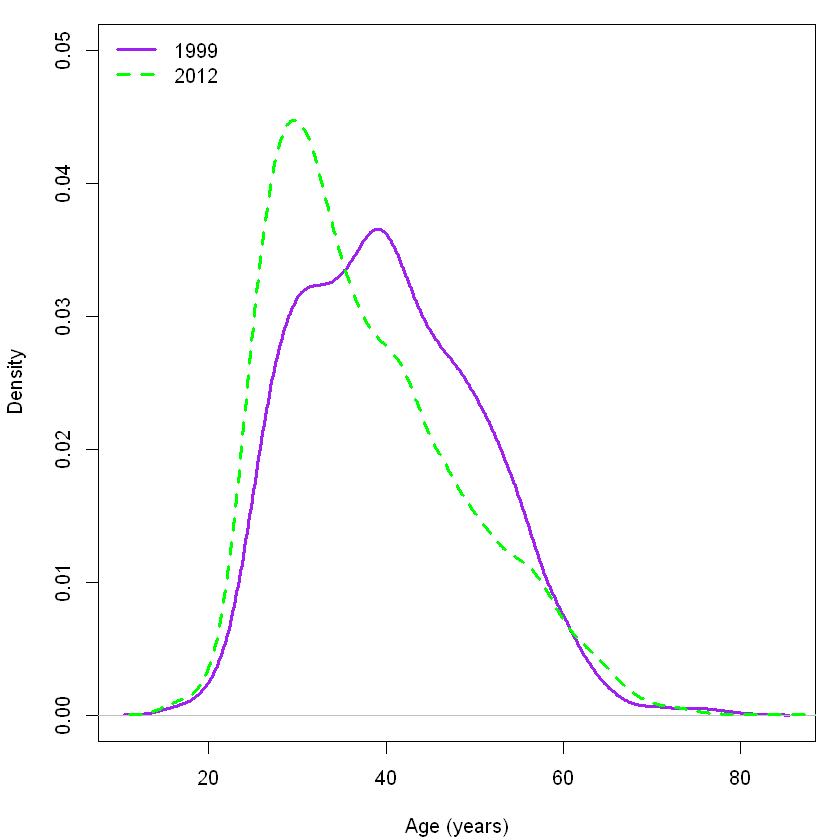

In [84]:
#pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

age1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
age2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

par(oldPar)
#dev.off()

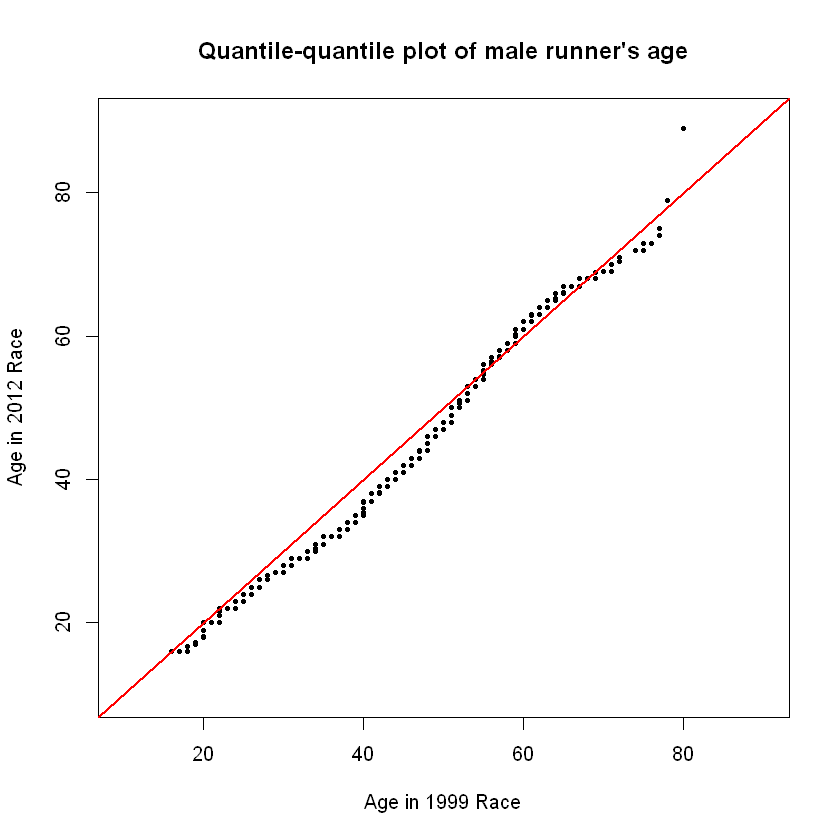

In [85]:
qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

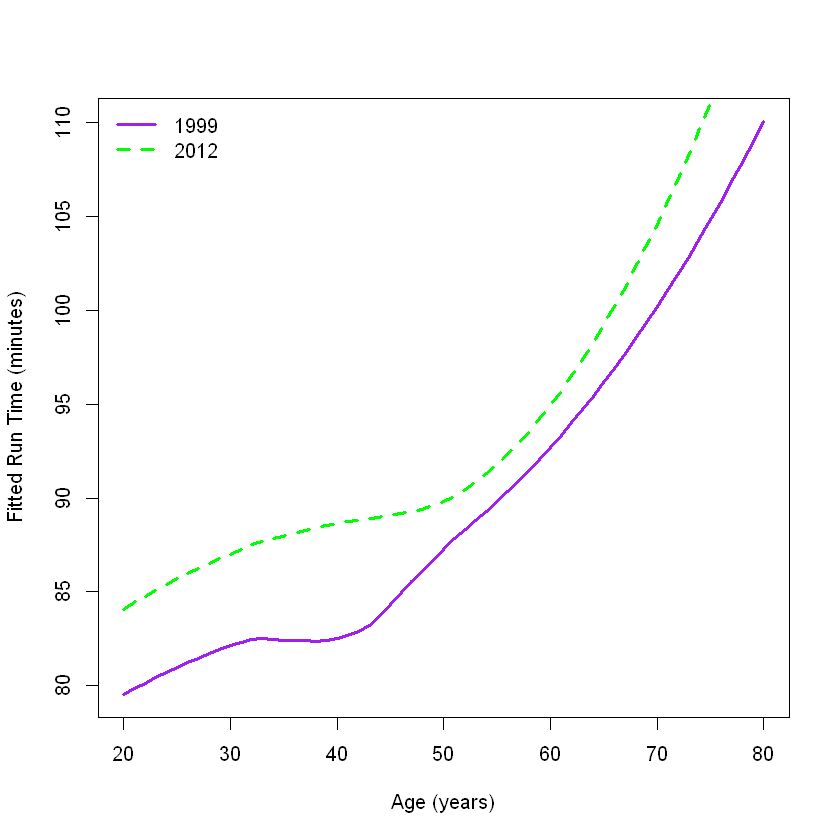

In [86]:



plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = mR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")


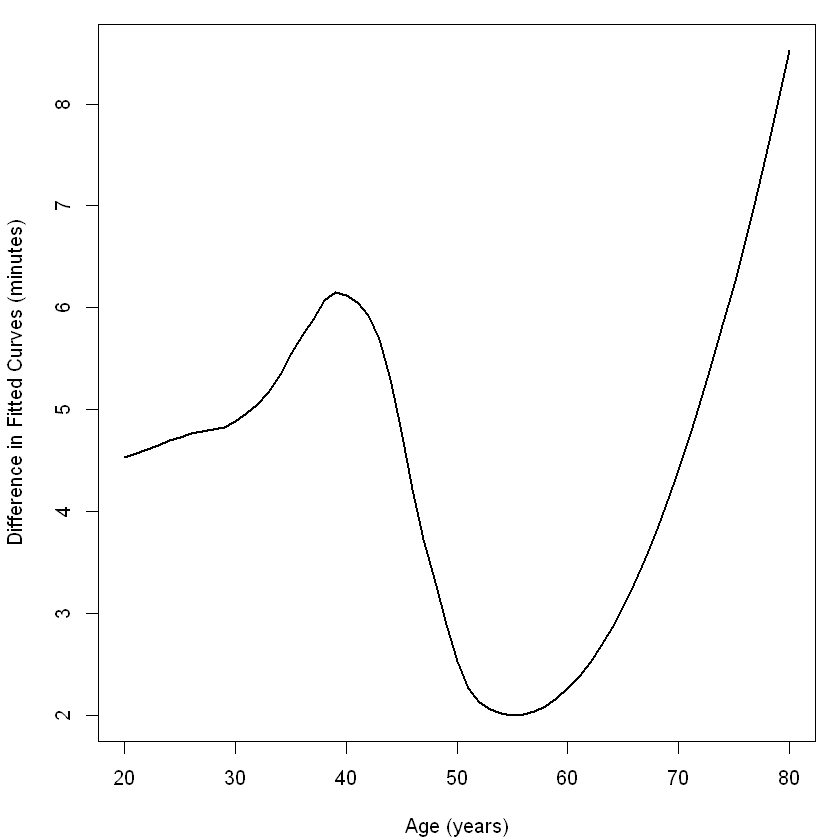

In [87]:
gap14 = mR.lo.pr12 - mR.lo.pr99

#pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
par(oldPar)
#dev.off()

In [88]:
length(cbMenSub$runTime)

[1] 63982

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.7267  1.2335  1.3991  1.4186  1.5888  2.5133       9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6951  1.3078  1.5103  1.5281  1.7229  2.7654      13 

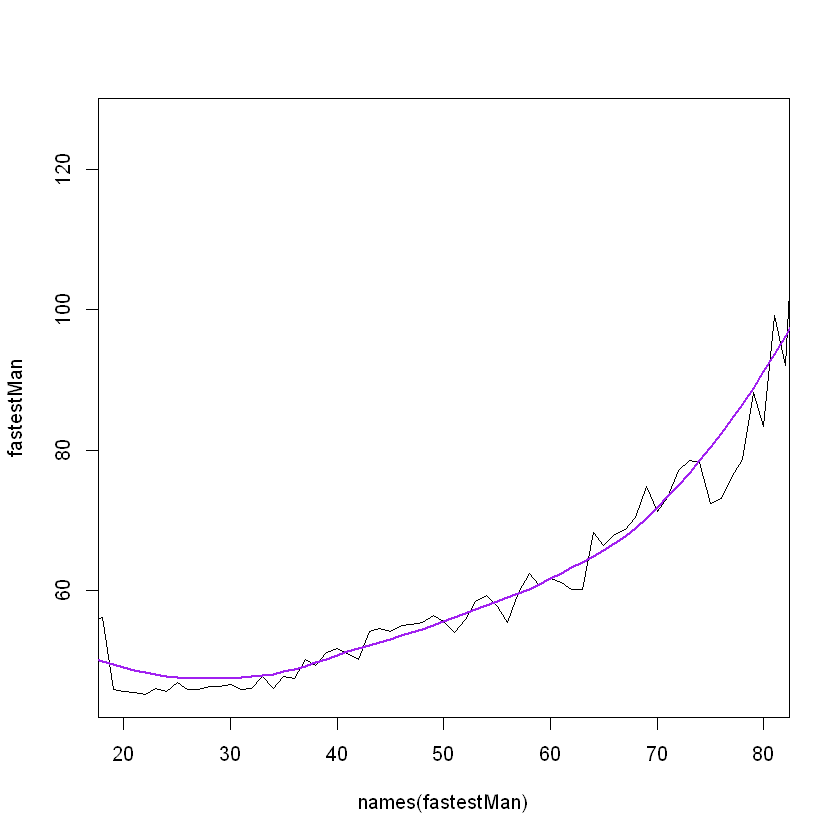

In [89]:
fastestMan = tapply(cbMenSub$runTime, cbMenSub$age, min, na.rm = TRUE)
plot(fastestMan ~ names(fastestMan), type ="l", xlim = c(20, 80))
ageFM = as.numeric(names(fastestMan))
mR.loF = loess(fastestMan ~ ageFM)
mR.lo.prF = predict(mR.loF, data.frame(age = ageFM), se = FALSE)
lines(x = ageFM, y = mR.lo.prF, col = "purple", lwd = 2)

timeNorm = cbMenSub$runTime / mR.lo.prF[as.character(cbMenSub$age)]
time99Norm = timeNorm[cbMenSub$year == 1999]
time12Norm = timeNorm[cbMenSub$year == 2012]
summary(time99Norm)

summary(time12Norm)

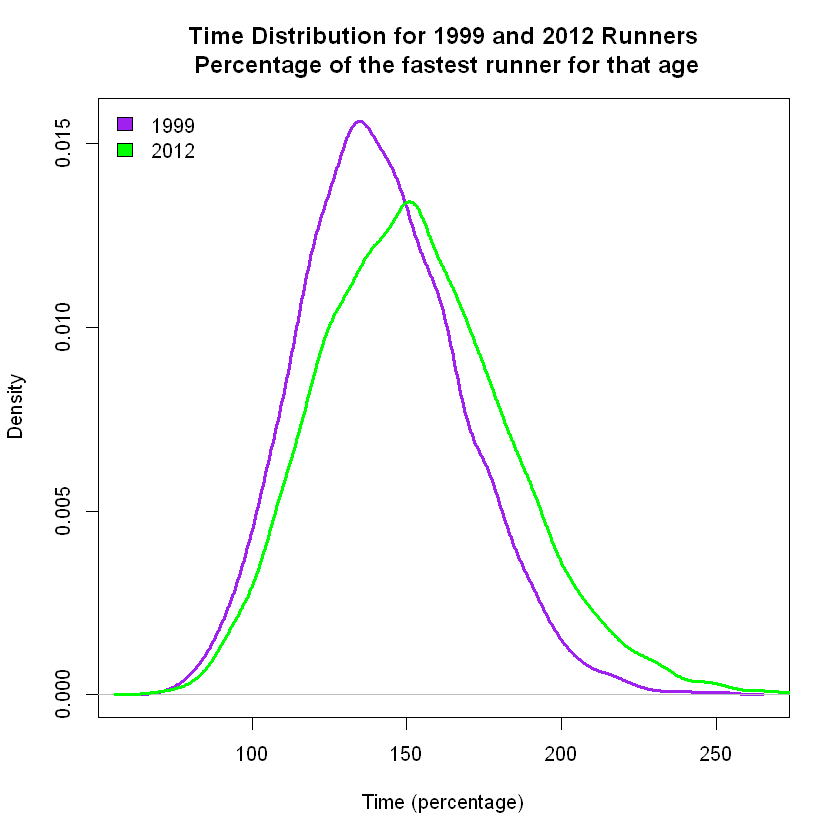

In [90]:

plot(density(100*time99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple",
     lwd = 3,  xlab = "Time (percentage)",
     main = "Time Distribution for 1999 and 2012 Runners\n Percentage of the fastest runner for that age")
lines(density(100*time12Norm, na.rm = TRUE), 
          lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"),
       legend = c("1999", "2012"), bty = "n")


In [91]:

trimBlanks = function(charVector) {
  nameClean = gsub("^[[:blank:]]+", "", charVector)
  nameClean = gsub("[[:blank:]]+$", "", nameClean)
  nameClean = gsub("[[:blank:]]+", " ", nameClean)
}

nameClean = trimBlanks(cbMenSub$name)

length(nameClean)

length(unique(nameClean))

table(table(nameClean))

head( sort(table(nameClean), decreasing = TRUE), 1)

mSmith = cbMenSub[nameClean == "Michael Smith", ]

head(unique(mSmith$home))

nameClean = tolower(nameClean)

head( sort(table(nameClean), decreasing = TRUE), 1)

nameClean = gsub("[,.]", "", nameClean)

tabNameYr = table(cbMenSub$year, nameClean)

max(tabNameYr)

class(tabNameYr)

mode(tabNameYr)

names(attributes(tabNameYr))

dim(tabNameYr)

head(colnames(tabNameYr), 3)

which( tabNameYr == max(tabNameYr) )

which( tabNameYr == max(tabNameYr), arr.ind = TRUE )

indMax = which( tabNameYr == max(tabNameYr), arr.ind = TRUE )
colnames(tabNameYr)[indMax[2]]

cbMenSub$nameClean = nameClean

cbMenSub$yob = cbMenSub$year - cbMenSub$age

[1] 63982

[1] 40626


    1     2     3     4     5     6     7     8     9    10    11    12    13 
28249  7288  2460  1202   632   329   212   109    61    47    22     5     5 
   15    16    18    26 
    1     1     2     1 

Michael Smith 
           26

[1] "Annapolis MD      "  "Bethesda MD       "  "Annapolis MD       "
[4] "Springfield VA     " "Chevy Chase MD    "  "Annandale VA      "

michael smith 
           29

[1] 5

[1] "table"

[1] "numeric"

[1] "dim"      "dimnames" "class"

[1]    13 37250

[1] "8illiam maury"   "a gudu memon"    "a miles simmons"

[1] 314769

,,nameClean
2012,13,24213


[1] "michael brown"

In [92]:

# Fix home in a similar way
homeClean = trimBlanks(tolower(cbMenSub$home))
cbMenSub$homeClean = gsub("[,.]", "", homeClean)

vars = c("year", "homeClean", "nameClean", "yob",  "runTime")
mb = which(nameClean == "michael brown")
birthOrder = order(cbMenSub$yob[mb])
cbMenSub[mb[birthOrder], vars]

cbMenSub$ID = paste(nameClean, cbMenSub$yob, sep = "_")

,year,homeClean,nameClean,yob,runTime
2000.2526,2000,tucson az,michael brown,1939,96.88333
2010.4241,2010,north east md,michael brown,1953,92.26667
2011.3026,2011,north east md,michael brown,1953,85.95000
2012.3800,2012,north east md,michael brown,1953,88.43333
2009.5246,2009,oakton va,michael brown,1957,99.73333
2008.3896,2008,ashburn va,michael brown,1958,93.73333
2009.3509,2009,ashburn va,michael brown,1958,88.56667
2010.5309,2010,ashburn va,michael brown,1958,99.75000
2012.4078,2012,reston va,michael brown,1958,89.95000
2006.2631,2006,chevy chase,michael brown,1966,84.56667


In [93]:

races = tapply(cbMenSub$year, cbMenSub$ID, length)

races8 = names(races)[which(races >= 8)]

men8 = cbMenSub[ cbMenSub$ID %in% races8, ]

orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(unique(men8$ID))

gapTime = tapply(men8$runTime, men8$ID,
                 function(t) any(abs(diff(t)) > 20))

gapTime = sapply(men8L, function(df) 
                          any(abs(diff(df$runTime)) > 20))

sum(gapTime)

[1] 347

[1] 34

In [94]:

lapply(men8L[ gapTime ][1:2], function(df) df[, vars])

homeLen = nchar(cbMenSub$homeClean)

cbMenSub$state = substr(cbMenSub$homeClean, 
                        start = homeLen - 1, stop = homeLen)

cbMenSub$state[cbMenSub$year == 2006] = NA

cbMenSub$ID = paste(cbMenSub$nameClean, cbMenSub$yob, 
                    cbMenSub$state, sep = "_")

numRaces = tapply(cbMenSub$year, cbMenSub$ID, length)
races8 = names(numRaces)[which(numRaces >= 8)]
men8 = cbMenSub[ cbMenSub$ID %in% races8, ]
orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(races8)

,year,homeClean,nameClean,yob,runTime
1999.2640,1999,gaithersburg md,abiy zewde,1967,96.51667
2000.2616,2000,montgomery vill md,abiy zewde,1967,96.63333
2001.2276,2001,montgomery vill md,abiy zewde,1967,89.10000
2002.3684,2002,montgomery vill md,abiy zewde,1967,123.00000
2004.3579,2004,montgomery vill md,abiy zewde,1967,100.36667
2008.4562,2008,montgomery vill md,abiy zewde,1967,98.78333
2009.5072,2009,montgomery villag md,abiy zewde,1967,98.50000
2010.5330,2010,montgomery villag md,abiy zewde,1967,99.91667
2011.6493,2011,montgomery villag md,abiy zewde,1967,113.10000
2012.3085,2012,montgomery villag md,abiy zewde,1967,84.88333


[1] 181

In [95]:

groups = 1 + (1:length(men8L) %% 9)

In [96]:

addRunners = function(listRunners, colors, numLty) 
{
  numRunners = length(listRunners)
  colIndx = 1 + (1:numRunners) %% length(colors)
  ltys = rep(1:numLty, each = length(colors), length = numRunners)

  mapply(function(df, i) {      
           lines(df$runTime ~ df$age, 
           col = colors[colIndx[i]], lwd = 2, lty = ltys[i])
         }, listRunners, i = 1:numRunners) 
}


In [97]:

fitOne = function(oneRunner, addLine = FALSE, col = "grey") {
  lmOne = lm(runTime ~ age, data = oneRunner)
  if (addLine) 
    lines(x = oneRunner$age, y = predict(lmOne), 
          col = col, lwd = 2, lty = 2)

  ind = floor( (nrow(oneRunner) + 1) / 2)
  res = c(coefficients(lmOne)[2], oneRunner$age[ind],
          predict(lmOne)[ind])
  names(res) = c("ageCoeff", "medAge", "predRunTime")
  return(res)
}

$`augustine paik_1955_md`
NULL

$`brandon dubois_1966_va`
NULL

$`craig witmer_1961_va`
NULL

$`david sahnow_1963_md`
NULL

$`edward hagarty_1955_md`
NULL

$`frank myers_1962_va`
NULL

$`grant stewart_1971_va`
NULL

$`jay jacob wind_1950_va`
NULL

$`john miller_1954_pa`
NULL

$`joseph valenza_1947_md`
NULL

$`kevin mcmahon_1960_va`
NULL

$`marc gunther_1951_md`
NULL

$`michael davitt_1954_md`
NULL

$`mike acuna_1966_md`
NULL

$`paul foster_1956_md`
NULL

$`ray celeste_1959_va`
NULL

$`robert gray_1956_md`
NULL

$`roy cargiulo_1962_va`
NULL

$`thomas engle_1959_va`
NULL

$`victor finnegan_1957_pa`
NULL

$`augustine paik_1955_md`
   ageCoeff      medAge predRunTime 
  0.4195642  50.0000000  83.1515948 

$`brandon dubois_1966_va`
   ageCoeff      medAge predRunTime 
  -1.721321   42.000000   82.788664 

$`craig witmer_1961_va`
   ageCoeff      medAge predRunTime 
  0.6594608  43.0000000  82.8337255 

$`david sahnow_1963_md`
   ageCoeff      medAge predRunTime 
  0.3181521  42.0000000  76.7559542 

$`edward hagarty_1955_md`
   ageCoeff      medAge predRunTime 
 0.02400249 50.00000000 85.27024106 

$`frank myers_1962_va`
   ageCoeff      medAge predRunTime 
  0.3917652  43.0000000  77.3315034 

$`grant stewart_1971_va`
   ageCoeff      medAge predRunTime 
   1.471905   31.000000   78.762440 

$`jay jacob wind_1950_va`
   ageCoeff      medAge predRunTime 
   1.203074   57.000000   70.965196 

$`john miller_1954_pa`
   ageCoeff      medAge predRunTime 
   1.229131   51.000000   83.838061 

$`joseph valenza_1947_md`
   ageCoeff      medAge predRunTime 
 0.01023367 57.00000000 82.78291104 

$`kevin mcmahon_1960_va`
   ageCoeff      medAge predRunTime 
  0.2754435  44.0000000  76.2107376 

$`marc gunther_1951_md`
   ageCoeff      medAge predRunTime 
 0.07689266 53.00000000 93.32983051 

$`michael davitt_1954_md`
   ageCoeff      medAge predRunTime 
  0.3675656  50.0000000  88.5051263 

$`mike acuna_1966_md`
   ageCoeff      medAge predRunTime 
 0.04397311 42.00000000 75.58940658 

$`paul foster_1956_md`
   ageCoeff      medAge predRunTime 
 -0.1280039  49.0000000  87.5759259 

$`ray celeste_1959_va`
   ageCoeff      medAge predRunTime 
   3.275254   46.000000   92.504923 

$`robert gray_1956_md`
   ageCoeff      medAge predRunTime 
 0.06338259 52.00000000 91.25779967 

$`roy cargiulo_1962_va`
   ageCoeff      medAge predRunTime 
  0.6099291  43.0000000 111.8826241 

$`thomas engle_1959_va`
   ageCoeff      medAge predRunTime 
  -0.477603   46.000000   80.626457 

$`victor finnegan_1957_pa`
   ageCoeff      medAge predRunTime 
  0.1410831  48.0000000  93.8449631

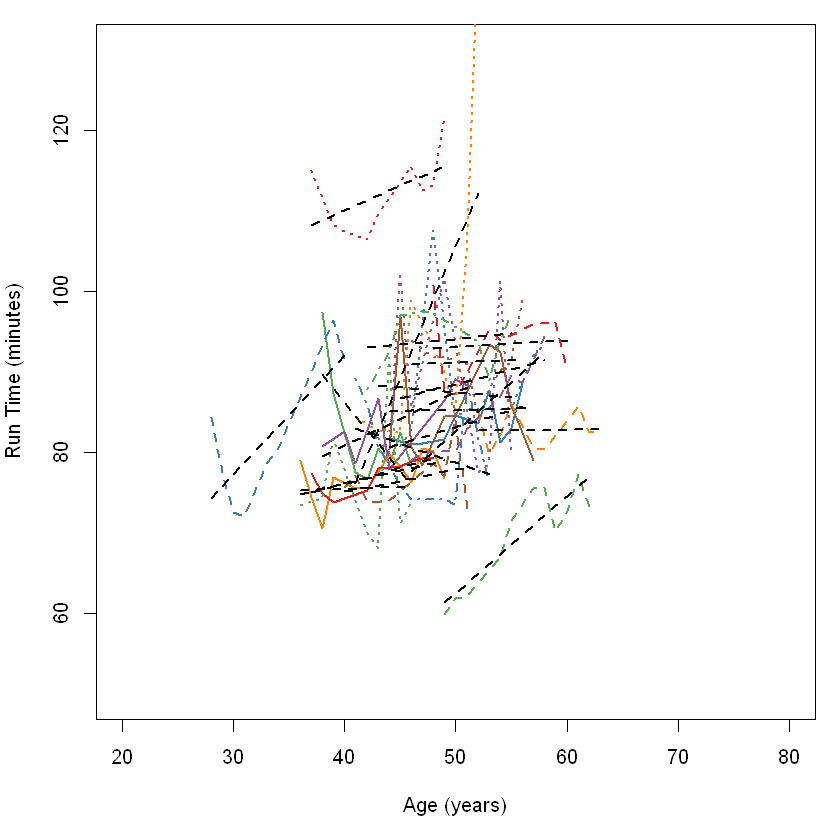

In [98]:
colors = c("#e41a1c", "#377eb8","#4daf4a", "#984ea3", 
           "#ff7f00", "#a65628")

par(mfrow = c(1, 1), mar = c(5, 4, 1, 1))

plot( x = 0, y = 0, type = "n",
      xlim = c(20, 80), ylim = c(50, 130),
      xlab = "Age (years)", ylab = "Run Time (minutes)")
     
addRunners(men8L[ groups == 9 ], colors, numLty = 6)
lapply(men8L[groups == 9], fitOne, addLine = TRUE, col = "black")

In [99]:
men8LongFit = lapply(men8L, fitOne)
coeffs = sapply(men8LongFit, "[", "ageCoeff" )
ages = sapply(men8LongFit, "[", "medAge")

longCoeffs = lm(coeffs ~ ages)

summary(longCoeffs)


Call:
lm(formula = coeffs ~ ages)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1476 -0.6420 -0.1524  0.4034  3.2821 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.639006   0.362521  -4.521 1.12e-05 ***
ages         0.049173   0.007243   6.789 1.60e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9365 on 179 degrees of freedom
Multiple R-squared:  0.2048,	Adjusted R-squared:  0.2003 
F-statistic: 46.09 on 1 and 179 DF,  p-value: 1.6e-10


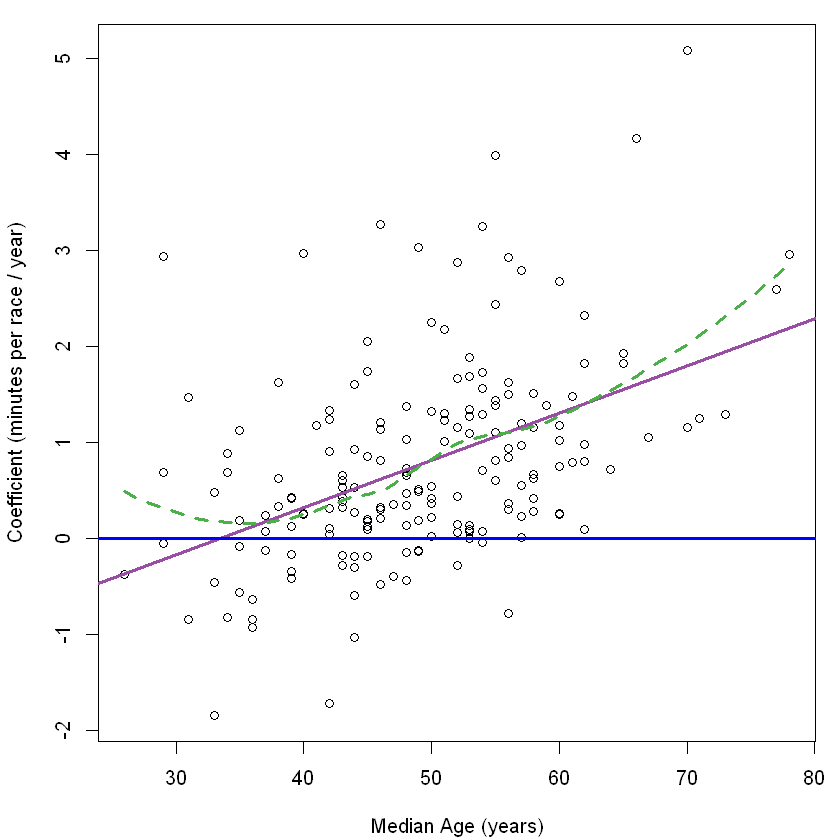

In [100]:

#pdf("CB_LongCoeffs.pdf", width = 10, height = 7)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(coeffs ~ ages, xlab = "Median Age (years)",
     ylab = "Coefficient (minutes per race / year)")
abline(longCoeffs, col = "#984ea3", lwd = 3)
abline(h = 0, col="blue", lwd = 3)
loCoeffs = loess(coeffs ~ ages)
ageV = min(ages):max(ages)
predV = predict(loCoeffs, new = data.frame(ages = ageV))
lines(x = ageV, y = predV, lwd = 3, lty = 2, col = "#4daf4a")
par(oldPar)
#dev.off()